In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [39]:
df = pd.read_csv("../data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)

# Criando dataframe com os dados com ocorrência única de won ou lost

In [40]:
df_simple = df[df['status'].isin(['won', 'lost'])]

In [47]:
df_simple['status'].value_counts()

won     543
lost    431
Name: status, dtype: int64

In [42]:
f1 = df_simple[(df_simple['status'] == 'won') & (df_simple['contract_end_date'].isna())] 
f2 = df_simple[(df_simple['status'] == 'lost') & (df_simple['contract_end_date'].notna())] 

df_simple = pd.concat([f1, f2])


<AxesSubplot:xlabel='contract_end_date'>

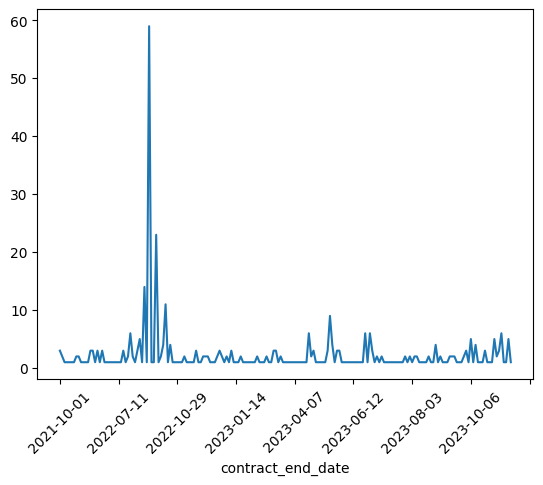

In [64]:
df_simple.groupby('contract_end_date')['status'].count().sort_index().rolling(1).sum().plot(rot=45)

In [43]:
#ordenar por data de entrada mas antes converter para datetime
df_simple['contract_start_date'] = pd.to_datetime(df_simple['contract_start_date'])
df_simple = df_simple.sort_values(by=['contract_start_date'])

In [44]:
df_simple

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
24,483,1947-03-31,64.0,80.0,Minas Gerais,Juiz de Fora,36021-600,453.0,1201.0,2021-01-27,...,3.0,2023-05-29 16:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
28,654,1962-02-07,64.0,82.0,Rio de Janeiro,Rio de Janeiro,20710-060,412.0,1194.0,2021-04-25,...,4.0,2022-10-26 19:22:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37,972,1986-09-22,63.0,82.0,Minas Gerais,Uberlândia,38400-438,932.0,NaN,2021-06-28,...,1.0,2022-05-03 16:51:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38,973,1986-10-11,64.0,80.0,Minas Gerais,Uberlândia,38405-364,412.0,NaN,2021-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
39,974,1987-05-16,63.0,80.0,Minas Gerais,Uberlândia,38405-364,NaN,NaN,2021-06-28,...,4.0,2022-04-20 19:40:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,5944,2001-10-23,64.0,80.0,Paraíba,João Pessoa,58052-310,NaN,NaN,2023-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [46]:
#Dado um intervalo de tempo, criar analises de churn baseado na saúde da empresa
#Criar um modelo de previsão de churn
# saintes, entrantes, médias de pagamentos, std.pagamentos. Qde Total de Tentativas de Cobrança, Qde Total de Faturas

df_filtered = df_simple[df_simple['contract_start_date'].between('2021-01-01', '2021-12-31')]
df_filtered

#novo dataframe com as colunas que serão usadas no modelo

new_df = pd.DataFrame(columns=['saintes', 'entrantes', 'media_pagamentos', 'std_pagamentos', 'qde_total_tentativas_cobranca', 'qde_total_faturas', 'churn'])

#atribuir valores ao novo dataframe






,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
24,483,1947-03-31,64.0,80.0,Minas Gerais,Juiz de Fora,36021-600,453.0,1201.0,2021-01-27,...,3.0,2023-05-29 16:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
28,654,1962-02-07,64.0,82.0,Rio de Janeiro,Rio de Janeiro,20710-060,412.0,1194.0,2021-04-25,...,4.0,2022-10-26 19:22:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37,972,1986-09-22,63.0,82.0,Minas Gerais,Uberlândia,38400-438,932.0,NaN,2021-06-28,...,1.0,2022-05-03 16:51:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38,973,1986-10-11,64.0,80.0,Minas Gerais,Uberlândia,38405-364,412.0,NaN,2021-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
39,974,1987-05-16,63.0,80.0,Minas Gerais,Uberlândia,38405-364,NaN,NaN,2021-06-28,...,4.0,2022-04-20 19:40:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1996,1986-09-12,64.0,80.0,São Paulo,São Carlos,13572-090,NaN,NaN,2021-12-23,...,6.0,2022-05-23 14:14:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
174,1995,1998-03-04,64.0,80.0,São Paulo,São Carlos,13564-031,435.0,NaN,2021-12-23,...,1.0,2022-01-17 21:41:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
173,1994,1989-07-09,64.0,80.0,São Paulo,São Carlos,13560-290,79.0,NaN,2021-12-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
172,1993,2001-08-22,64.0,80.0,São Paulo,São Carlos,13568-290,438.0,NaN,2021-12-23,...,1.0,2022-03-21 17:42:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
